In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

file_path = '/content/drive/My Drive/senators analysis/namayandeh-6dore.xlsx'
df = pd.read_excel(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56572 entries, 0 to 56571
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     56572 non-null  object
 1   name                   56572 non-null  object
 2   link_ax                56572 non-null  object
 3   savagegh_tahsilat.1    47619 non-null  object
 4   savagegh_tahsilat.2    47857 non-null  object
 5   doreha.2               56572 non-null  object
 6   sal_semat              19686 non-null  object
 7   ozviat_comision        19686 non-null  object
 8   howzeh                 56572 non-null  object
 9   tarh_emza_shedeh       55687 non-null  object
 10  link_tarh_emza_shodeh  19777 non-null  object
 11  tarikh_tarh            19777 non-null  object
 12  ham_howzeh             49413 non-null  object
dtypes: object(13)
memory usage: 5.6+ MB


In [5]:
df

,id,name,link_ax,savagegh_tahsilat.1,savagegh_tahsilat.2,doreha.2,sal_semat,ozviat_comision,howzeh,tarh_emza_shedeh,link_tarh_emza_shodeh,tarikh_tarh,ham_howzeh
0,https://rc.majlis.ir/fa/parliament_member/show...,علی آذری,https://rc.majlis.ir/rc-assets/pm/980193222.az...,رئیس دادگستری فریمان,دانشجوی دکتری جزا و جرم شناسی,دوره یازدهم,"سال سوم : عضو , سال دوم : نایب رئیس اول , ...","کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران",خراسان رضوی (فاروج / قوچان),طرح شفافیت قوای سه گانه و دستگاه های اجرایی و ...,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/09/29,1400/06/12,1399/07/09,14...","علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
1,https://rc.majlis.ir/fa/parliament_member/show...,علی آذری,https://rc.majlis.ir/rc-assets/pm/980193222.az...,رئیس دادگستری فریمان,دانشجوی دکتری جزا و جرم شناسی,دوره یازدهم,"سال سوم : عضو , سال دوم : نایب رئیس اول , ...","کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران",خراسان رضوی (فاروج / قوچان),طرح اصلاح بند « ب» ماده ( ۱) قانون برگزاری من...,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/09/29,1400/06/12,1399/07/09,14...","علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
2,https://rc.majlis.ir/fa/parliament_member/show...,علی آذری,https://rc.majlis.ir/rc-assets/pm/980193222.az...,رئیس دادگستری فریمان,دانشجوی دکتری جزا و جرم شناسی,دوره یازدهم,"سال سوم : عضو , سال دوم : نایب رئیس اول , ...","کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران",خراسان رضوی (فاروج / قوچان),طرح الحاق یک تبصره به «قانون اهداف، وظایف و ...,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/09/29,1400/06/12,1399/07/09,14...","علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
3,https://rc.majlis.ir/fa/parliament_member/show...,علی آذری,https://rc.majlis.ir/rc-assets/pm/980193222.az...,رئیس دادگستری فریمان,دانشجوی دکتری جزا و جرم شناسی,دوره یازدهم,"سال سوم : عضو , سال دوم : نایب رئیس اول , ...","کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران",خراسان رضوی (فاروج / قوچان),تقسیم مجدد استانهای کشور,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/09/29,1400/06/12,1399/07/09,14...","علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
4,https://rc.majlis.ir/fa/parliament_member/show...,علی آذری,https://rc.majlis.ir/rc-assets/pm/980193222.az...,رئیس دادگستری فریمان,دانشجوی دکتری جزا و جرم شناسی,دوره یازدهم,"سال سوم : عضو , سال دوم : نایب رئیس اول , ...","کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران",خراسان رضوی (فاروج / قوچان),رصد لحظه ای میزان برداشت نفت خام و میعانات گازی,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/09/29,1400/06/12,1399/07/09,14...","علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56567,https://rc.majlis.ir/fa/parliament_member/show...,حجت اله فیروزی,https://rc.majlis.ir/rc-assets/pm/1031885295.f...,معاون حقوقی قرارگاه خاتم الانبیاء,دکترای حقوق,دوره یازدهم,"سال سوم : عضو , سال سوم : عضو , سال دوم : ...","کمیسیون صنایع و معادن , کمیسیون تلفیق, کمیسیو...",فارس (فسا),طرح الحاق یک تبصره به بیمه محصولات کشاورزی,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/03/09,1400/09/14,1400/05/13,14...","مجید انصاری,عبدالعلی رحیمی مظفری,فریدون عبا..."
56568,https://rc.majlis.ir/fa/parliament_member/show...,حجت اله فیروزی,https://rc.majlis.ir/rc-assets/pm/1031885295.f...,معاون حقوقی قرارگاه خاتم الانبیاء,دکترای حقوق,دوره یازدهم,"سال سوم : عضو , سال سوم : عضو , سال دوم : ...","کمیسیون صنایع و معادن , کمیسیون تلفیق, کمیسیو...",فارس (فسا),طرح جهش تولید و تامین مسکن,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/03/09,1400/09/14,1400/05/13,14...","مجید انصاری,عبدالعلی رحیمی مظفری,فریدون عبا..."
56569,https://rc.majlis.ir/fa/parliament_member/show...,حجت اله فیروزی,https://rc.majlis.ir/rc-assets/pm/1031885295.f...,معاون حقوقی قرارگاه خاتم الانبیاء,دکترای حقوق,دوره یازدهم,"سال سوم : عضو , سال سوم : عضو , سال دوم : ...","کمیسیون صنایع و معادن , کمیسیون تلفیق, کمیسیو...",فارس (فسا),طرح اصلاح موادی از قانون آئین نامه داخلی مجلس ...,https://rc.majlis.ir/fa/legal_draft/show/174

In [6]:
df['tarh_emza_shedeh'].isnull().sum()

885

In [7]:
df=df.dropna(subset=['tarh_emza_shedeh'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55687 entries, 0 to 56571
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     55687 non-null  object
 1   name                   55687 non-null  object
 2   link_ax                55687 non-null  object
 3   savagegh_tahsilat.1    47617 non-null  object
 4   savagegh_tahsilat.2    47855 non-null  object
 5   doreha.2               55687 non-null  object
 6   sal_semat              19686 non-null  object
 7   ozviat_comision        19686 non-null  object
 8   howzeh                 55687 non-null  object
 9   tarh_emza_shedeh       55687 non-null  object
 10  link_tarh_emza_shodeh  19777 non-null  object
 11  tarikh_tarh            19777 non-null  object
 12  ham_howzeh             49412 non-null  object
dtypes: object(13)
memory usage: 5.9+ MB


In [9]:
df

,id,name,link_ax,savagegh_tahsilat.1,savagegh_tahsilat.2,doreha.2,sal_semat,ozviat_comision,howzeh,tarh_emza_shedeh,link_tarh_emza_shodeh,tarikh_tarh,ham_howzeh
0,https://rc.majlis.ir/fa/parliament_member/show...,علی آذری,https://rc.majlis.ir/rc-assets/pm/980193222.az...,رئیس دادگستری فریمان,دانشجوی دکتری جزا و جرم شناسی,دوره یازدهم,"سال سوم : عضو , سال دوم : نایب رئیس اول , ...","کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران",خراسان رضوی (فاروج / قوچان),طرح شفافیت قوای سه گانه و دستگاه های اجرایی و ...,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/09/29,1400/06/12,1399/07/09,14...","علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
1,https://rc.majlis.ir/fa/parliament_member/show...,علی آذری,https://rc.majlis.ir/rc-assets/pm/980193222.az...,رئیس دادگستری فریمان,دانشجوی دکتری جزا و جرم شناسی,دوره یازدهم,"سال سوم : عضو , سال دوم : نایب رئیس اول , ...","کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران",خراسان رضوی (فاروج / قوچان),طرح اصلاح بند « ب» ماده ( ۱) قانون برگزاری من...,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/09/29,1400/06/12,1399/07/09,14...","علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
2,https://rc.majlis.ir/fa/parliament_member/show...,علی آذری,https://rc.majlis.ir/rc-assets/pm/980193222.az...,رئیس دادگستری فریمان,دانشجوی دکتری جزا و جرم شناسی,دوره یازدهم,"سال سوم : عضو , سال دوم : نایب رئیس اول , ...","کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران",خراسان رضوی (فاروج / قوچان),طرح الحاق یک تبصره به «قانون اهداف، وظایف و ...,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/09/29,1400/06/12,1399/07/09,14...","علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
3,https://rc.majlis.ir/fa/parliament_member/show...,علی آذری,https://rc.majlis.ir/rc-assets/pm/980193222.az...,رئیس دادگستری فریمان,دانشجوی دکتری جزا و جرم شناسی,دوره یازدهم,"سال سوم : عضو , سال دوم : نایب رئیس اول , ...","کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران",خراسان رضوی (فاروج / قوچان),تقسیم مجدد استانهای کشور,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/09/29,1400/06/12,1399/07/09,14...","علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
4,https://rc.majlis.ir/fa/parliament_member/show...,علی آذری,https://rc.majlis.ir/rc-assets/pm/980193222.az...,رئیس دادگستری فریمان,دانشجوی دکتری جزا و جرم شناسی,دوره یازدهم,"سال سوم : عضو , سال دوم : نایب رئیس اول , ...","کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران",خراسان رضوی (فاروج / قوچان),رصد لحظه ای میزان برداشت نفت خام و میعانات گازی,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/09/29,1400/06/12,1399/07/09,14...","علی آذری,اکبر احمدپور,احسان ارکانی,فاطمه ر..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56567,https://rc.majlis.ir/fa/parliament_member/show...,حجت اله فیروزی,https://rc.majlis.ir/rc-assets/pm/1031885295.f...,معاون حقوقی قرارگاه خاتم الانبیاء,دکترای حقوق,دوره یازدهم,"سال سوم : عضو , سال سوم : عضو , سال دوم : ...","کمیسیون صنایع و معادن , کمیسیون تلفیق, کمیسیو...",فارس (فسا),طرح الحاق یک تبصره به بیمه محصولات کشاورزی,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/03/09,1400/09/14,1400/05/13,14...","مجید انصاری,عبدالعلی رحیمی مظفری,فریدون عبا..."
56568,https://rc.majlis.ir/fa/parliament_member/show...,حجت اله فیروزی,https://rc.majlis.ir/rc-assets/pm/1031885295.f...,معاون حقوقی قرارگاه خاتم الانبیاء,دکترای حقوق,دوره یازدهم,"سال سوم : عضو , سال سوم : عضو , سال دوم : ...","کمیسیون صنایع و معادن , کمیسیون تلفیق, کمیسیو...",فارس (فسا),طرح جهش تولید و تامین مسکن,https://rc.majlis.ir/fa/legal_draft/show/17429...,"1401/01/23,1400/03/09,1400/09/14,1400/05/13,14...","مجید انصاری,عبدالعلی رحیمی مظفری,فریدون عبا..."
56569,https://rc.majlis.ir/fa/parliament_member/show...,حجت اله فیروزی,https://rc.majlis.ir/rc-assets/pm/1031885295.f...,معاون حقوقی قرارگاه خاتم الانبیاء,دکترای حقوق,دوره یازدهم,"سال سوم : عضو , سال سوم : عضو , سال دوم : ...","کمیسیون صنایع و معادن , کمیسیون تلفیق, کمیسیو...",فارس (فسا),طرح اصلاح موادی از قانون آئین نامه داخلی مجلس ...,https://rc.majlis.ir/fa/legal_draft/show/174

(نماینده‌ها و طرح‌هایی که به آن رای داده‌اند)

In [10]:
Graph=nx.Graph()

In [11]:
from networkx.algorithms import bipartite
Graph.add_nodes_from(df['name'], bipartite=0)
Graph.add_nodes_from(df['tarh_emza_shedeh'], bipartite=1)

In [12]:
edges = [(row['name'], row['tarh_emza_shedeh']) for _, row in df.iterrows()]
Graph.add_edges_from(edges)

In [13]:
print(Graph)

Graph with 2163 nodes and 55272 edges


In [14]:
nx.write_graphml(Graph,'namayandeha-tarh-6dore.graphml')

degree centrality

In [15]:
degree_centrality = nx.degree_centrality(Graph)


In [16]:
degrees = pd.DataFrame.from_dict({
    'node': list(degree_centrality.keys()),
    'centrality': list(degree_centrality.values())
})

**نمایندگانی** که بیشترین مشارکت در رای گیری را داشته اند.


> Indented block






In [18]:
degrees.sort_values(by=['centrality'], ascending=False)

,node,centrality
657,حسین علی حاجی دلیگانی,0.228955
778,محمدحسین فرهنگی,0.228030
777,جعفر قادری,0.225717
709,سید جواد حسینی کیا,0.194727
543,نادر قاضی پور,0.186401
...,...,...
90,جعفر علیپور بهزادی,0.000463
2159,طرح فهرست قوانین و احکام نامعتبردرحوزه شوراها ...,0.000463
2160,طرح فهرست قوانین و احکام نامعتبر در حوزه احزاب...,0.000463
2161,طرح اصلاح تبصره (1) و (9) ذیل ماده واحده قانون...,0.000463


Betweenness Centrality

In [21]:
from networkx.algorithms.centrality import betweenness
betweenness_centrality = nx.betweenness_centrality(Graph)


In [22]:
betweenness = pd.DataFrame.from_dict({
    'node': list(betweenness_centrality.keys()),
    'centrality': list(betweenness_centrality.values())
})

In [23]:
betweenness

,node,centrality
0,علی آذری,0.000143
1,الهام آزاد,0.000110
2,یحیی ابراهیمی,0.000247
3,مصطفی آقامیرسلیم,0.000830
4,اکبر احمدپور,0.000011
...,...,...
2158,طرح استفساریه بند (۲) ماده (۲) قانون مالیات ها...,0.000006
2159,طرح فهرست قوانین و احکام نامعتبردرحوزه شوراها ...,0.000000
2160,طرح فهرست قوانین و احکام نامعتبر در حوزه احزاب...,0.000000
2161,طرح اصلاح تبصره (1) و (9) ذیل ماده واحده قانون...,0.000000


نمایندگان بی طرف

In [24]:
betweenness.sort_values(by=['centrality'], ascending=False)

,node,centrality
777,جعفر قادری,0.055508
778,محمدحسین فرهنگی,0.047620
657,حسین علی حاجی دلیگانی,0.044628
765,علیرضا سلیمی,0.038976
666,سیدکاظم دلخوش اباتری,0.029195
...,...,...
90,جعفر علیپور بهزادی,0.000000
2159,طرح فهرست قوانین و احکام نامعتبردرحوزه شوراها ...,0.000000
2160,طرح فهرست قوانین و احکام نامعتبر در حوزه احزاب...,0.000000
2161,طرح اصلاح تبصره (1) و (9) ذیل ماده واحده قانون...,0.000000


In [25]:
from networkx.algorithms import community

louvain_communities = list(community.louvain_communities(Graph , resolution=1))
num_communities = len(louvain_communities)
print("Number of Communities:", num_communities)

for i, community_nodes in enumerate(louvain_communities):
    print(f"Community {i + 1}: {list(community_nodes)}")

Number of Communities: 4
Community 1: ['طرح مقابله با اخلال ارزی و مجازات اخلالگران', 'طرح واگذاری خدمات حمایتی به کمیته امداد امام خمینی (ره) و خدمات توانبخشی به سازمان بهزیستی', 'محمدباقر شریعتی', 'طرح تشکیل کمیسیون ویژه تحول، تعالی و آینده نگری مجلس شورای اسلامی', 'یوناتن بت کلیا', 'حمیدرضا خصوصی ثانی', 'طرح استفساریه تبصره (6) قانون نحوه تقویم ابنیه، املاک و اراضی مورد نیاز شهرداری ها', 'عبداله تمیمی', 'طرح اصلاح موادی از قانون نظام مهندسی و کنترل ساختمان', 'طرح سنجش و پذیرش دانشجو در دوره های تحصیلات تکمیلی در دانشگاه ها و مراکز آموزشی عالی کشور', 'روبرت بگلریان', 'طرح اصلاح ماده (53) قانون برنامه پنج ساله پنجم توسعه جمهوری اسلامی ایران', 'طرح الحاق یک تبصره به ماده (87) قانون مدیریت خدمات کشوری درخصوص کاهش ساعت کاری کارکنان دولت در ماه رمضان', 'طرح واگذاری مدیریتی شبکه های ورزشی صدا و سیما', 'حمید رسائی', 'طرح حمایت از صنعت برق کشور', 'قاسم احمدی لاشکی', 'طرح استفساریه ماده (7) قانون اعزام دانشجو به خارج از کشور', 'سیدمهدی هاشمی', 'امیرعباس سلطانی', 'طرح اساسنامه شرکت ملی نفت ایر

In [26]:
from networkx.algorithms.community.louvain import modularity
greedy_modularity=modularity(Graph ,louvain_communities )
greedy_modularity

0.5355083437375436

In [27]:
from networkx.algorithms import community

communities = list(community.greedy_modularity_communities(Graph))
num_communities = len(communities)
print("Number of Communities:", num_communities)

for i, community_nodes in enumerate(communities):
    print(f"Community {i + 1}: {list(community_nodes)}")

Number of Communities: 3
Community 1: ['طرح تمدید مهلت اجرای آزمایشی قانون مجازات اسلامی', 'طرح مقابله با اخلال ارزی و مجازات اخلالگران', 'طرح واگذاری خدمات حمایتی به کمیته امداد امام خمینی (ره) و خدمات توانبخشی به سازمان بهزیستی', 'محمدباقر شریعتی', 'طرح تشکیل کمیسیون ویژه تحول، تعالی و آینده نگری مجلس شورای اسلامی', 'طرح اصلاح قانون انتخابات مجلس شورای اسلامی و الحاق موادی به آن', 'حسن ونایی', 'طرح اصلاح ماده (11) قانون تمرکز امور صنعت و معدن و تشکیل وزارت صنایع و معادن', 'حمیدرضا خصوصی ثانی', 'طرح عقد قرارداد مستقیم با نیروهای خدماتی توسط دستگاههای اجرایی و حذف شرکت های پیمانکار', 'طرح فوق العاده خاص پرسنل سازمان پزشکی قانونی', 'طرح اصلاح موادی از قانون نظام مهندسی و کنترل ساختمان', 'عبداله تمیمی', 'مجید نصیرپورسردهائی', 'طرح سنجش و پذیرش دانشجو در دوره های تحصیلات تکمیلی در دانشگاه ها و مراکز آموزشی عالی کشور', 'طرح اصلاح ماده (53) قانون برنامه پنج ساله پنجم توسعه جمهوری اسلامی ایران', 'روبرت بگلریان', 'طرح الحاق یک تبصره به ماده (87) قانون مدیریت خدمات کشوری درخصوص کاهش ساعت کاری 

نمیشه بر اساس نوع گره ها جداشون کرد؟

In [28]:
from networkx.algorithms.community.louvain import modularity
greedy_modularity=modularity(Graph ,communities )
greedy_modularity

0.47627473314854163

one paartite
نمایندگانی که طرح‌های مشترک امضا کرده اند.

In [29]:
namayandeha = nx.bipartite.projected_graph(Graph, nodes=df['name'])
nx.write_graphml(namayandeha,'namayandeha.graphml')

In [30]:
degree_centrality2 = nx.degree_centrality(namayandeha)


In [31]:
degrees2 = pd.DataFrame.from_dict({
    'node': list(degree_centrality2.keys()),
    'centrality': list(degree_centrality2.values())
})


نمایندگان با ارتباطات بالا

In [32]:
degrees2.sort_values(by=['centrality'], ascending=False)

,node,centrality
765,علیرضا سلیمی,0.998726
718,شهباز حسن پور بیگلری,0.996178
704,حسینعلی شهریاری,0.992357
85,اسفندیار اختیاری کَسنویه یزد,0.991083
736,محمدرضا رضایی کوچی,0.988535
...,...,...
716,سید مرتضی حسینی,0.203822
645,مجید انصاری,0.198726
109,محمدرضا فاکر,0.177070
90,جعفر علیپور بهزادی,0.175796


موثرترین نماینده‌ها

In [33]:
from networkx.algorithms.centrality import betweenness
betweenness_centrality2 = nx.betweenness_centrality(namayandeha)

In [34]:
betweenness2 = pd.DataFrame.from_dict({
    'node': list(betweenness_centrality2.keys()),
    'centrality': list(betweenness_centrality2.values())
})

In [35]:
betweenness2.sort_values(by=['centrality'], ascending=False)

,node,centrality
765,علیرضا سلیمی,6.105665e-03
718,شهباز حسن پور بیگلری,6.004507e-03
704,حسینعلی شهریاری,5.934961e-03
85,اسفندیار اختیاری کَسنویه یزد,5.912605e-03
666,سیدکاظم دلخوش اباتری,5.816069e-03
...,...,...
357,عدل هاشمی پور,3.358486e-07
119,داریوش قمری,3.161835e-07
447,علی جلیلیان,1.327678e-07
224,عمران علی محمدی,6.597351e-08


نمایندگانی که منطق فکری یکسانی دارند

In [36]:
from networkx.algorithms import community

louvain_communities = list(community.louvain_communities(namayandeha , resolution=1))
num_communities = len(louvain_communities)
print("Number of Communities:", num_communities)

for i, community_nodes in enumerate(louvain_communities):
    print(f"Community {i + 1}: {list(community_nodes)}")

Number of Communities: 4
Community 1: ['موسی الرضا ثروتی', 'محمد کرمی راد', 'حسن ونایی', 'سیدعلی محمد موسوی مبارکه', 'حسن شبانپور', 'یوناتن بت کلیا', 'امیر طاهرخانی', 'محمدمهدی شهریاری', 'سیدحسین دهدشتی', 'مجید نصیرپورسردهائی', 'مهدی سنایی', 'روبرت بگلریان', 'غلامعلی حداد عادل', 'علی اصغر حسنی', 'ولی اسماعیلی', 'بهمن مرادنیا', 'وکیل سپه آجیرلو', 'جمشید انصاری', 'حمید رسائی', 'یوسف قاسمی گولک', 'یعقوب جدگال', 'کاظم فرهمند', 'حسین فدایی آشیانی', 'سیداحمدرضا «علی اصغر» دستغیب', 'ضرغام صادقی', 'سیدیونس موسوی سرچشمه', 'علی عزتی', 'سیدعلی میرخلیلی', 'سیدرضا اکرمی', 'سیدحسین ذوالانوار', 'اکبر رنجبرزاده', 'حجت اله رحمانی', 'شاهرخ رامین', 'محمدرضا صابری', 'سیدنجیب حسینی', 'محمدرضا محسنی ثانی', 'جواد صبورآقچه کندی', 'عبدالعزیز جمشیدزهی', 'علی مطهری', 'سیداحمدرضا دستغیب «فخرالدین»', 'طیبه صفایی', 'یوسف نجفی', 'ایوب پایری مقدم\u200c فرد', 'لاله افتخاری', 'سیدحسین هاشمی', 'محمدحسین نژادفلاح', 'موید حسینی صدر', 'علی شاهرخی', 'غلامرضا اسدالهی', 'داود محمدجانی', 'حسن ملک محمدی', 'سیدجواد زمانی', 'محسن

In [37]:
from networkx.algorithms.community.louvain import modularity
greedy_modularity=modularity(namayandeha ,louvain_communities )
greedy_modularity

0.2585738088871847

جداکردن گروه ها / subgraphs

In [ ]:
community_subgraphs = []
for community_nodes in louvain_communities:
    subgraph = Graph.subgraph(community_nodes).copy()
    community_subgraphs.append(subgraph)

for i, subgraph in enumerate(community_subgraphs):
    print(f"Community {i+1} Subgraph Nodes: {subgraph.nodes()}")

In [ ]:
for i, subgraph in enumerate(community_subgraphs):
    print(f"Community {i+1} Subgraph Nodes: {subgraph.nodes()}")


In [38]:
from networkx.algorithms import community

communities = list(community.greedy_modularity_communities(namayandeha))
num_communities = len(communities)
print("Number of Communities:", num_communities)

for i, community_nodes in enumerate(communities):
    print(f"Community {i + 1}: {list(community_nodes)}")

Number of Communities: 2
Community 1: ['احمد  آریایی نژاد', 'محمد کرمی راد', 'محمدباقر شریعتی', 'حسن ونایی', 'یوناتن بت کلیا', 'حمیدرضا خصوصی ثانی', 'عطاءاله سلطانی صبور', 'عبداله تمیمی', 'سیدحسین دهدشتی', 'ابراهیم نکو', 'مجید نصیرپورسردهائی', 'روبرت بگلریان', 'علی اصغر حسنی', 'ولی اسماعیلی', 'بهمن مرادنیا', 'سید حمیدرضا طباطبایی نائینی', 'الیاس طاهری', 'حمید رسائی', 'یوسف قاسمی گولک', 'ضرغام صادقی', 'حسین فدایی آشیانی', 'محمد فیروزی', 'قاسم احمدی لاشکی', 'سیدمرتضی حسینی', 'سیدیونس موسوی سرچشمه', 'سیدمهدی هاشمی', 'سیدرضا اکرمی', 'محمداسماعیل سعیدی', 'امیرعباس سلطانی', 'حجت اله رحمانی', 'محمدرضا صابری', 'علی زنجانی حسنلویی', 'صفر نعیمی رز', 'شاهرخ رامین', 'محمدحسین قربانی', 'کمال الدین پیرمؤذن', 'علی مطهری', 'مجید جلیل سرقلعه', 'سیداحمدرضا دستغیب «فخرالدین»', 'طیبه صفایی', 'لاله افتخاری', 'حامد قادرمزی', 'محمدحسین نژادفلاح', 'سیدجواد زمانی', 'محسن نریمان', 'عباس صلاحی', 'سیدحسین حسینی', 'رسول خضری', 'محمدرضا شعبانی', 'نبی اله احمدی', 'اسماعیل جلیلی', 'سید محمدحسین میرمحمدی', 'انوشیروان 

In [39]:
from networkx.algorithms.community.louvain import modularity
greedy_modularity=modularity(namayandeha ,communities )
greedy_modularity

0.23309895443657389

طرح هایی که توسط هر حزب امضا شده اند

In [40]:
tarhayemoshtarak = nx.bipartite.projected_graph(Graph, nodes=df['tarh_emza_shedeh'])
nx.write_graphml(tarhayemoshtarak,'tarhayemoshtarak.graphml')

In [41]:
from networkx.algorithms import community

louvain_communities = list(community.louvain_communities(tarhayemoshtarak , resolution=1))
num_communities = len(louvain_communities)
print("Number of Communities:", num_communities)

for i, community_nodes in enumerate(louvain_communities):
    print(f"Community {i + 1}: {list(community_nodes)}")

Number of Communities: 3
Community 1: ['طرح تشکیل کمیته جذب سرمایه های داخلی و صدور مجوز ایجاد واحدهای تولیدی', 'طرح فهرست قوانین و احکام نامعتبر در حوزه احزاب سیاسی', 'طرح فهرست قوانین و احکام نامعتبردرحوزه شوراها و شهرداریها', 'طرح سازمان نظام روزنامه نگاری جمهوری اسلامی ایران', 'طرح تعطیلی روز پنجشنبه کلیه مراکز اداری و آموزشی و قضایی در کلیه استانها و شهرستانها همانند تهران', 'طرح اصلاح ماده (609) قانون مجازات اسلامی(کتاب پنجم- تعزیرات)', 'طرح اعاده اموال نامشروع مسؤولان کشور', 'طرح &quot;الحتق یک تبصره به بند (ج) ماده (24) قانون الحاق برخی مواد به قانون تنظیم بخشی از مقررات مالی دولت (2)&quot;', 'طرح  اجرای اصل بیست و هفتم (27) قانون اساسی', 'لایحه &quot;میزان و نحوه جریمه نقدی و توقف دارندگان وسایل نقلیه و واحدهای مشمول متمرد موضوع تبصره (1) ماده (3) قانون هوای پاک -مصوب1396-&quot;', 'طرح الحاق یک تبصره به ماده 353 قانون آیین دادرسی کیفری درخصوص اجرای علنی دادرسی درباره جرائم اقتصادی', 'طرح انتخاب روسای بنیاد شهید و امور ایثارگران توسط جامعه هدف', 'طرح اصلاح بند (ه) تبصره (1) قان

In [ ]:
community_subgraphs = []
for community_nodes in louvain_communities:
    subgraph = Graph.subgraph(community_nodes).copy()
    community_subgraphs.append(subgraph)

for i, subgraph in enumerate(community_subgraphs):
    print(f"Community {i+1} Subgraph Nodes: {subgraph.nodes()}")

Community 1 Subgraph Nodes: ['طرح استفساریه ماده (24) قانون بیمه مصوب 7/2/1316', 'طرح تسری قانون فوق العاده خاص کارمندان سازمان های پزشکی قانونی کشور و انتقال خون ایران به کارمندان دامپزشکی کشور', 'طرح اصلاح تبصره (2) ماده (39) قانون نظام جامع خدمات رسانی به ایثارگران', 'طرح استفساریه در خصوص تبصره (1) ماده واحده الحاقی صندوق بیمه اجتماعی روستائیان و عشایر به فهرست نهادها و موسسات عمومی دولتی', 'طرح الحاق یک تبصره به قانون واگذاری دوهزار هکتار از منابع ملی شده اطراف چابهار به شهرداری چابهار', 'طرح استفساریه ماده 81 قانون مالیات های مستقیم مصوب 3/12/1366  و اصلاحات بعدی آن', 'طرح اصلاح تبصره (1) ماده (5) قانون حمایت از شرکت ها و موسسات دانش بنیان و تجاری سازی نوآوری ها و اختراعات', 'طرح الحاق یک تبصره به ماده (64) قانون مالیاتهای مستقیم مصوب 1366 و اصلاحات بعدی آن', 'طرح اصلاح قانون بیمه اجتماعی رانندگان حمل و نقل بار و مسافر بین شهری', 'طرح صیانت از حریم عفاف و حجاب', 'طرح اصلاح قانون الحاق سه تبصره به بند (12) ماده (4) قانون نیروی انتظامی جمهوری اسلامی ایران', 'طرح تعیین تکلیف استخدام

رابطه بین نمایندگان و کمیسیون ها

In [42]:
com_graph=nx.Graph()

In [43]:
com_df=df[['name', 'ozviat_comision' ]]

In [44]:
com_df

,name,ozviat_comision
0,علی آذری,"کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران"
1,علی آذری,"کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران"
2,علی آذری,"کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران"
3,علی آذری,"کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران"
4,علی آذری,"کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران"
...,...,...
56567,حجت اله فیروزی,"کمیسیون صنایع و معادن , کمیسیون تلفیق, کمیسیو..."
56568,حجت اله فیروزی,"کمیسیون صنایع و معادن , کمیسیون تلفیق, کمیسیو..."
56569,حجت اله فیروزی,"کمیسیون صنایع و معادن , کمیسیون تلفیق, کمیسیو..."
56570,حجت اله فیروزی,"کمیسیون صنایع و معادن , کمیسیون تلفیق, کمیسیو..."


In [45]:
# Replace non-standard commas with standard commas in 'ozviat_comision'
com_df.loc[:, 'ozviat_comision'] = com_df['ozviat_comision'].str.replace('،', ',')

# Split 'ozviat_comision' and create 'comission' column
com_df['comission'] = com_df['ozviat_comision'].str.split(',')


<ipython-input-45-42b311113ddc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_df.loc[:, 'ozviat_comision'] = com_df['ozviat_comision'].str.replace('،', ',')
<ipython-input-45-42b311113ddc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_df['comission'] = com_df['ozviat_comision'].str.split(',')


In [46]:
com_df['comission']

0         [ کمیسیون عمران,  کمیسیون تحقیق,  کمیسیون عمران]
1         [ کمیسیون عمران,  کمیسیون تحقیق,  کمیسیون عمران]
2         [ کمیسیون عمران,  کمیسیون تحقیق,  کمیسیون عمران]
3         [ کمیسیون عمران,  کمیسیون تحقیق,  کمیسیون عمران]
4         [ کمیسیون عمران,  کمیسیون تحقیق,  کمیسیون عمران]
                               ...                        
56567    [ کمیسیون صنایع و معادن ,  کمیسیون تلفیق,  کمی...
56568    [ کمیسیون صنایع و معادن ,  کمیسیون تلفیق,  کمی...
56569    [ کمیسیون صنایع و معادن ,  کمیسیون تلفیق,  کمی...
56570    [ کمیسیون صنایع و معادن ,  کمیسیون تلفیق,  کمی...
56571    [ کمیسیون صنایع و معادن ,  کمیسیون تلفیق,  کمی...
Name: comission, Length: 55687, dtype: object

In [47]:
com_df_=com_df.explode('comission' , ignore_index=False)


In [48]:
com_df_

,name,ozviat_comision,comission
0,علی آذری,"کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران",کمیسیون عمران
0,علی آذری,"کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران",کمیسیون تحقیق
0,علی آذری,"کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران",کمیسیون عمران
1,علی آذری,"کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران",کمیسیون عمران
1,علی آذری,"کمیسیون عمران, کمیسیون تحقیق, کمیسیون عمران",کمیسیون تحقیق
...,...,...,...
56570,حجت اله فیروزی,"کمیسیون صنایع و معادن , کمیسیون تلفیق, کمیسیو...",کمیسیون صنایع و معادن
56571,حجت اله فیروزی,"کمیسیون صنایع و معادن , کمیسیون تلفیق, کمیسیو...",کمیسیون صنایع و معادن
56571,حجت اله فیروزی,"کمیسیون صنایع و معادن , کمیسیون تلفیق, کمیسیو...",کمیسیون تلفیق
56571,حجت اله فیروزی,"کمیسیون صنایع و معادن , کمیسیون تلفیق, کمیسیو...",کمیسیون صنایع و معادن


In [49]:
com_df_=com_df_.drop('ozviat_comision', axis=1)

In [50]:
com_df_

,name,comission
0,علی آذری,کمیسیون عمران
0,علی آذری,کمیسیون تحقیق
0,علی آذری,کمیسیون عمران
1,علی آذری,کمیسیون عمران
1,علی آذری,کمیسیون تحقیق
...,...,...
56570,حجت اله فیروزی,کمیسیون صنایع و معادن
56571,حجت اله فیروزی,کمیسیون صنایع و معادن
56571,حجت اله فیروزی,کمیسیون تلفیق
56571,حجت اله فیروزی,کمیسیون صنایع و معادن


In [51]:
com_df_=com_df_.dropna(subset='comission')

In [52]:
com_df_.drop_duplicates()

,name,comission
0,علی آذری,کمیسیون عمران
0,علی آذری,کمیسیون تحقیق
43,الهام آزاد,کمیسیون اصل نودم قانون اساسی مجلس
85,یحیی ابراهیمی,کمیسیون بهداشت و درمان
158,مصطفی آقامیرسلیم,کمیسیون تدوین آیین‌نامه داخلی مجلس
...,...,...
56173,رسول فرخی میکال,کمیسیون امنیت ملی و سیاست خارجی
56466,ابوالفضل عمویی,کمیسیون امنیت ملی و سیاست خارجی
56466,ابوالفضل عمویی,کمیسیون تدوین آیین‌نامه داخلی مجلس
56484,حجت اله فیروزی,کمیسیون صنایع و معادن


In [53]:
com_graph.add_nodes_from(com_df_['name'] , bipartite=0)
com_graph.add_nodes_from(com_df_['comission'] , bipartite=1)

In [54]:
print(com_graph)

Graph with 240 nodes and 0 edges


In [55]:
com2_graph=nx.Graph()
com2_graph=nx.from_pandas_edgelist(com_df_, 'name' , 'comission')

In [56]:
print(com2_graph)

Graph with 240 nodes and 346 edges


In [57]:
com_df_['comission']


0                  کمیسیون عمران
0                  کمیسیون تحقیق
0                  کمیسیون عمران
1                  کمیسیون عمران
1                  کمیسیون تحقیق
                  ...           
56570     کمیسیون صنایع و معادن 
56571     کمیسیون صنایع و معادن 
56571              کمیسیون تلفیق
56571     کمیسیون صنایع و معادن 
56571     کمیسیون صنایع و معادن 
Name: comission, Length: 78731, dtype: object

In [58]:
edges = [(row['name'], row['comission']) for index, row in com_df_.iterrows()]


In [59]:
com_graph.add_edges_from(edges)


In [60]:
com2_graph.edges

EdgeView([('علی  آذری', ' کمیسیون عمران'), ('علی  آذری', ' کمیسیون تحقیق'), (' کمیسیون عمران', 'صدیف بدری'), (' کمیسیون عمران', 'محمد  سرگزی'), (' کمیسیون عمران', 'مجتبی  یوسفی'), (' کمیسیون عمران', 'منصور آرامی'), (' کمیسیون عمران', 'عبدالجلال ایری'), (' کمیسیون عمران', 'حمزه  امینی'), (' کمیسیون عمران', 'احمد جباری'), (' کمیسیون عمران', 'دکتر علی اصغر  خانی'), (' کمیسیون عمران', 'احمد  دنیامالی'), (' کمیسیون عمران', 'سید البرز  حسینی'), (' کمیسیون عمران', 'شارلی  انویه تکیه'), (' کمیسیون عمران', 'کمال  حسین پور'), (' کمیسیون عمران', 'اسماعیل  حسین زهی'), (' کمیسیون عمران', 'محمدرضا رضایی کوچی'), (' کمیسیون عمران', 'اقبال  شاکری'), (' کمیسیون عمران', 'غلامرضا  شریعتی اندراتی'), (' کمیسیون عمران', 'آرا  شاوردیان'), (' کمیسیون عمران', 'کمال علیپور خنکداری'), (' کمیسیون عمران', 'رحمت اله  فیروزی پوربادی'), (' کمیسیون تحقیق', 'دکتر علی اصغر  خانی'), ('الهام  آزاد', ' کمیسیون اصل نودم قانون اساسی مجلس '), (' کمیسیون اصل نودم قانون اساسی مجلس ', 'مصطفی  آقامیرسلیم'), (' کمیسیون اصل نودم قان

In [61]:
print(com_graph)

Graph with 240 nodes and 346 edges


In [62]:
com_graph.edges

EdgeView([('علی  آذری', ' کمیسیون عمران'), ('علی  آذری', ' کمیسیون تحقیق'), ('الهام  آزاد', ' کمیسیون اصل نودم قانون اساسی مجلس '), ('یحیی  ابراهیمی', ' کمیسیون بهداشت و درمان '), ('مصطفی  آقامیرسلیم', ' کمیسیون تدوین آیین\u200cنامه داخلی مجلس '), ('مصطفی  آقامیرسلیم', ' کمیسیون اصل نودم قانون اساسی مجلس '), ('اکبر  احمدپور', ' کمیسیون آموزش و تحقیقات'), ('احد  آزادی خواه', ' کمیسیون کشاورزی'), ('احد  آزادی خواه', '  آب و منابع طبیعی '), ('رضا  آریان پور', ' کمیسیون بهداشت و درمان '), ('رضا  آریان پور', ' کمیسیون تلفیق'), ('احسان  ارکانی', ' کمیسیون تلفیق'), ('احسان  ارکانی', ' کمیسیون کمیسیون ویژه جهش و رونق تولید و نظارت بر اجرای اصل 44 قانون اساسی'), ('احسان  ارکانی', ' کمیسیون برنامه و بودجه و محاسبات '), ('امیرحسین  بانکی پورفرد', ' کمیسیون فرهنگی '), ('امیرحسین  بانکی پورفرد', ' کمیسیون تلفیق'), ('علی اکبر  بسطامی', ' کمیسیون اجتماعی '), ('علی اکبر  بسطامی', ' کمیسیون تلفیق'), ('صدیف بدری', ' کمیسیون عمران'), ('صدیف بدری', ' کمیسیون کمیسیون ویژه جهش و رونق تولید و نظارت بر اجرای 

In [63]:
print(com_graph)

Graph with 240 nodes and 346 edges


In [64]:
nx.write_graphml(com_graph,'namayandeha_comission.graphml')

centrality

greedy_modularity

In [65]:
from networkx.algorithms import community

communities = list(community.greedy_modularity_communities(com_graph))
num_communities = len(communities)
print("Number of Communities:", num_communities)

for i, community_nodes in enumerate(communities):
    print(f"Community {i + 1}: {list(community_nodes)}")

Number of Communities: 13
Community 1: ['محسن  علی زاده', 'مسلم  صالحی', 'علیرضا زندیان', 'مهدی باقری', 'مجتبی  توانگر', 'علی رضائی', ' کمیسیون تدوین آیین\u200cنامه داخلی مجلس ', 'انور حبیب زاده بوکانی', 'عفت شریعتی کوه بنانی', 'ابوالفضل  عمویی', 'سید لفته  احمدنژاد', 'صمد اله  محمدی', 'مهدی  طغیانی', 'غلامرضا  مرحبا', 'سیدکاظم دلخوش اباتری', 'علی اصغر  عنابستانی', 'شهباز حسن پور بیگلری', ' کمیسیون قضایی و حقوقی ', ' کمیسیون اقتصادی ', 'محمدحسین حسین زاده بحرینی', 'احمد امیرآبادی فراهانی', 'محمد  صفایی دلوئی', 'موسی غضنفرآبادی', 'علیرضا سلیمی', 'محمد باقری بنابی', 'محمد علیپور رحمتی']
Community 2: ['سید احسان  خاندوزی', 'مهدی  عسگری', 'یوسف داودی', ' کمیسیون کمیسیون ویژه جهش و رونق تولید و نظارت بر اجرای اصل 44 قانون اساسی', 'فرهاد  طهماسبی', 'رضا تقی پور انوری', 'صدیف بدری', 'سید محسن  دهنوی', 'روح اله  ایزدخواه', 'الهویردی دهقانی', 'معصومه  پاشایی بهرام', 'روح اله جانی عباسپور', 'مصطفی رضاحسینی  قطب آبادی', 'حجت اله  فیروزی', ' کمیسیون صنایع و معادن ', 'محمدحسین فرهنگی', 'بهزاد  رحیم

In [66]:
from networkx.algorithms.community.louvain import modularity
greedy_modularity=modularity(com_graph ,communities )
greedy_modularity

0.6602333856794415

کمیسیون‌هایی که بیشترین عضو را دارند

In [67]:
betweenness_centrality = nx.betweenness_centrality(com_graph)

betweenness4 = pd.DataFrame.from_dict({
    'node': list(betweenness_centrality.keys()),
    'betweenness_centrality': list(betweenness_centrality.values())
})

betweenness4.sort_values(by=['betweenness_centrality'], ascending=False)

,node,betweenness_centrality
229,کمیسیون تلفیق,0.834620
238,کمیسیون صنایع و معادن,0.111091
221,کمیسیون عمران,0.107407
224,کمیسیون بهداشت و درمان,0.106958
236,کمیسیون امنیت ملی و سیاست خارجی,0.091182
...,...,...
115,سید البرز حسینی,0.000000
1,الهام آزاد,0.000000
121,سید کریم حسینی,0.000000
122,شارلی انویه تکیه,0.000000


##نمایندگانی که در کمیسیون‌های مشترک عضو هستند

In [68]:
namayandeha_same_comission=nx.bipartite.projected_graph(com_graph , com_df_['name'])

با لیبل امتحان کردم اما نتیجه نداد.

In [ ]:
labels = dict(zip(com_df_['name'],com_df_['comission']))
nx.set_node_attributes(namayandeha_same_comission, labels, 'coms')


In [69]:
nx.write_graphml(namayandeha_same_comission,'namayandeha_same_comission_WITH_LABELS.graphml')


In [70]:
print(namayandeha_same_comission)

Graph with 221 nodes and 4439 edges


##communites

greedy modularity

In [71]:
from networkx.algorithms import community

communities = list(community.greedy_modularity_communities(namayandeha_same_comission))
num_communities = len(communities)
print("Number of Communities:", num_communities)

for i, community_nodes in enumerate(communities):
    print(f"Community {i + 1}: {list(community_nodes)}")

Number of Communities: 10
Community 1: ['سید البرز  حسینی', 'حسین علی حاجی دلیگانی', 'بهروز  محبی نجم آبادی', 'محمد  سرگزی', 'کمال  حسین پور', 'رحمت اله  فیروزی پوربادی', 'احسان  ارکانی', 'دکتر علی اصغر  خانی', 'محمد  رشیدی', 'محمدرضا رضایی کوچی', 'محمد خدابخشی', 'شارلی  انویه تکیه', 'احمد جباری', 'رجب رحمانی', 'منصور آرامی', 'علی اکبر  کریمی', 'اسماعیل  حسین زهی', 'احمد  دنیامالی', 'محسن  زنگنه', 'عبدالجلال ایری', 'ولی اله  فرزانه', 'آرش  زره تن لهونی', 'حمید رضا حاجی بابایی', 'علی  آذری', 'علیرضا  شهبازی', 'رضا تقی پور انوری', 'مجتبی  رضاخواه', 'صدیف بدری', 'کمال علیپور خنکداری', 'عیسی جعفری', 'غلامرضا  شریعتی اندراتی', 'مهرداد  گودرزوند چگینی', 'اقبال  شاکری', 'مجتبی  یوسفی', 'رحیم زارع', 'محمدرضا  دشتی اردکانی', 'سید شمس الدین  حسینی', 'رجب رحمنی', 'آرا  شاوردیان', 'جعفر قادری']
Community 2: ['ابراهیم  رضایی', 'زهره الهیان', 'علی  حدادی', 'ابراهیم عزیزی', 'محمدحسن آصفری', 'احمد   علیرضا بیگی', 'سیداحمد آوایی', 'سیدعلی  آقازاده دافساری ', 'احمد علیرضابیگی', 'مهدی  سعادتی بیشه سری', 

In [72]:
from networkx.algorithms.community.louvain import modularity
greedy_modularity=modularity(namayandeha_same_comission ,communities )
greedy_modularity

0.30138752028003857

louvain

In [73]:
from networkx.algorithms import community

louvain_communities = list(community.louvain_communities(namayandeha_same_comission))
num_communities = len(louvain_communities)
print("Number of Communities:", num_communities)
for i, community_nodes in enumerate(louvain_communities):
    print(f"Community {i + 1}: {list(community_nodes)}")

Number of Communities: 11
Community 1: ['حمزه  امینی', 'سید البرز  حسینی', 'علی  آذری', 'صدیف بدری', 'محمد  سرگزی', 'کمال علیپور خنکداری', 'غلامرضا  شریعتی اندراتی', 'رحمت اله  فیروزی پوربادی', 'کمال  حسین پور', 'دکتر علی اصغر  خانی', 'محمدرضا رضایی کوچی', 'شارلی  انویه تکیه', 'احمد جباری', 'اقبال  شاکری', 'مجتبی  یوسفی', 'منصور آرامی', 'اسماعیل  حسین زهی', 'آرا  شاوردیان', 'احمد  دنیامالی', 'عبدالجلال ایری']
Community 2: ['حسن رزمیان مقدم', 'حسینعلی شهریاری', 'حسن  شجاعی علی آبادی', 'زهرا  شیخی ', 'سید جلیل  میرمحمدی میبدی', 'محمدعلی  محسنی بند پی', 'یحیی  ابراهیمی', 'پروین  صالحی مبارکه', 'سید ناصر  حسینی پور', 'رضا  آریان پور', 'علی  خضریان', 'عبدالحسین  روح الامینی', 'فاطمه  محمدبیگی', 'حسینعلی  شهریاری', 'سید مسعود  خاتمی', 'ملک  فاضلی', 'سید محمّد  پاک مهر', 'الهام  آزاد', 'مصطفی  آقامیرسلیم', 'همایون  سامه یح نجف آبادی', 'غلامحسین  رضوانی', 'علی اصغر  باقرزاده', ' سید نظام الدین  موسوی', 'محسن  فتحی', 'سید مرتضی  خاتمی', 'علیرضا زاکانی']
Community 3: ['روح الله  متفکر آزاد', 'ام

In [74]:
from networkx.algorithms.community.louvain import modularity
louvain_modularity=modularity(namayandeha_same_comission ,louvain_communities )
louvain_modularity

0.3273804536486459

In [76]:
community_subgraphs = []
for community_nodes in louvain_communities:
    subgraph = Graph.subgraph(community_nodes).copy()
    community_subgraphs.append(subgraph)

for i, subgraph in enumerate(community_subgraphs):
    print(f"Community {i+1} Subgraph Nodes: {subgraph.nodes()}")

Community 1 Subgraph Nodes: ['حمزه  امینی', 'سید البرز  حسینی', 'محمد  سرگزی', 'کمال  حسین پور', 'رحمت اله  فیروزی پوربادی', 'دکتر علی اصغر  خانی', 'محمدرضا رضایی کوچی', 'شارلی  انویه تکیه', 'احمد جباری', 'منصور آرامی', 'اسماعیل  حسین زهی', 'احمد  دنیامالی', 'عبدالجلال ایری', 'علی  آذری', 'صدیف بدری', 'کمال علیپور خنکداری', 'غلامرضا  شریعتی اندراتی', 'اقبال  شاکری', 'مجتبی  یوسفی', 'آرا  شاوردیان']
Community 2 Subgraph Nodes: ['حسینعلی شهریاری', 'حسن  شجاعی علی آبادی', 'زهرا  شیخی ', 'محمدعلی  محسنی بند پی', 'رضا  آریان پور', 'علی  خضریان', 'مصطفی  آقامیرسلیم', 'همایون  سامه یح نجف آبادی', 'علی اصغر  باقرزاده', ' سید نظام الدین  موسوی', 'محسن  فتحی', 'سید مرتضی  خاتمی', 'علیرضا زاکانی', 'حسن رزمیان مقدم', 'یحیی  ابراهیمی', 'پروین  صالحی مبارکه', 'سید ناصر  حسینی پور', 'فاطمه  محمدبیگی', 'عبدالحسین  روح الامینی', 'حسینعلی  شهریاری', 'سید مسعود  خاتمی', 'ملک  فاضلی', 'سید محمّد  پاک مهر', 'الهام  آزاد', 'غلامحسین  رضوانی', 'سید جلیل  میرمحمدی میبدی']
Community 3 Subgraph Nodes: ['روح الل

موثرترین و فعالترین نمایندگان در کمیسیون‌هایشان

In [77]:
centrality_measures = {}
for i, subgraph in enumerate(community_subgraphs):
    # Degree Centrality
    degree_centrality = nx.degree_centrality(subgraph)
    max_degree_node = max(degree_centrality, key=degree_centrality.get)


    # Betweenness Centrality
    betweenness_centrality = nx.betweenness_centrality(subgraph)
    max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

    # Closeness Centrality
    closeness_centrality = nx.closeness_centrality(subgraph)
    max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)

    centrality_measures[f"Community {i+1}"] = {
        "Degree Centrality": (max_degree_node, degree_centrality[max_degree_node]),
        "Betweenness Centrality": (max_betweenness_node, betweenness_centrality[max_betweenness_node]),
        "Closeness Centrality": (max_closeness_node, closeness_centrality[max_closeness_node]),
    }

# Print the nodes with maximum centrality within each community
for community, max_nodes in centrality_measures.items():
    print(f"{community} Nodes with Maximum Centrality:")
    for centrality_type, (max_node, centrality_value) in max_nodes.items():
        print(f"{centrality_type}: Node {max_node}")
    print()

Community 1 Nodes with Maximum Centrality:
Degree Centrality: Node حمزه  امینی
Betweenness Centrality: Node حمزه  امینی
Closeness Centrality: Node حمزه  امینی

Community 2 Nodes with Maximum Centrality:
Degree Centrality: Node حسینعلی شهریاری
Betweenness Centrality: Node حسینعلی شهریاری
Closeness Centrality: Node حسینعلی شهریاری

Community 3 Nodes with Maximum Centrality:
Degree Centrality: Node روح الله  متفکر آزاد
Betweenness Centrality: Node روح الله  متفکر آزاد
Closeness Centrality: Node روح الله  متفکر آزاد

Community 4 Nodes with Maximum Centrality:
Degree Centrality: Node احد  آزادی خواه
Betweenness Centrality: Node احد  آزادی خواه
Closeness Centrality: Node احد  آزادی خواه

Community 5 Nodes with Maximum Centrality:
Degree Centrality: Node سید لفته  احمدنژاد
Betweenness Centrality: Node سید لفته  احمدنژاد
Closeness Centrality: Node سید لفته  احمدنژاد

Community 6 Nodes with Maximum Centrality:
Degree Centrality: Node زهره الهیان
Betweenness Centrality: Node زهره الهیان
Closenes

centrality

نمایندگانی که در چند کمیسیون عضو هستند و تعاملات بیشتری دارند.

In [78]:
closeness_centrality = nx.closeness_centrality(namayandeha_same_comission)

closness = pd.DataFrame.from_dict({
    'node': list(closeness_centrality.keys()),
    'closeness_centrality': list(closeness_centrality.values())
})

closness.sort_values(by=['closeness_centrality'], ascending=False)

,node,closeness_centrality
157,محمد رشیدی,0.639535
47,کیومرث سرمدی واله,0.635838
67,مرتضی محمودوند,0.635838
62,سید جلیل میرمحمدی میبدی,0.632184
151,محمدحسین حسین زاده بحرینی,0.628571
...,...,...
63,غلامرضا منتظری,0.383944
135,حسین جلالی,0.383944
75,مرتضی آقاتهرانی,0.383944
23,سید مجتبی محفوظی,0.383944


In [79]:
closness

,node,closeness_centrality
0,علی آذری,0.408163
1,الهام آزاد,0.396396
2,یحیی ابراهیمی,0.400000
3,مصطفی آقامیرسلیم,0.448980
4,اکبر احمدپور,0.413534
...,...,...
216,موسی غضنفرآبادی,0.432220
217,مهدی عیسی زاده,0.616246
218,رسول فرخی میکال,0.437376
219,ابوالفضل عمویی,0.457380


نمایندگانی که بیشترین تاثیر در ارتباط بین کمیسیون‌ها دارند.

In [80]:
betweenness_centrality = nx.betweenness_centrality(namayandeha_same_comission)

betweenness4 = pd.DataFrame.from_dict({
    'node': list(betweenness_centrality.keys()),
    'betweenness_centrality': list(betweenness_centrality.values())
})

betweenness4.sort_values(by=['betweenness_centrality'], ascending=False)

,node,betweenness_centrality
62,سید جلیل میرمحمدی میبدی,0.068063
157,محمد رشیدی,0.034230
164,احمد راستینه هفشجانی,0.030801
8,امیرحسین بانکی پورفرد,0.030801
47,کیومرث سرمدی واله,0.027882
...,...,...
125,محمدصالح جوکار,0.000000
66,غلامرضا مرحبا,0.000000
68,سید لفته احمدنژاد,0.000000
122,شارلی انویه تکیه,0.000000


به طور میانگین هر نماینده با ۴۰ نماینده دیگر در کمیسیون‌ها مختلف همکار است.


---



In [81]:
average_degree = sum(dict(nx.degree(namayandeha_same_comission)).values()) / len(namayandeha_same_comission)
print("Average Degree:", average_degree)

Average Degree: 40.171945701357465


##کمیسیون طرح ها

In [82]:
file_path2 = '/content/drive/My Drive/senators analysis/tarh.xlsx'
df2 = pd.read_excel(file_path2)

In [83]:
df2

,id,name,QR_code,tarikh_vosul,doreh,madeh_141,madeh_102,shomareh_sabt,comision_asli,comision_fare,nama_hendesi
0,https://rc.majlis.ir/fa/legal_draft/show/1776031,طرح اصلاح ماده ۸ قانون منع فروش و واگذاری اراض...,https://rc.majlis.ir/rc-assets/qr/1776031.png,1402-03-07 00:00:00,یازدهم,خیر,خیر,898,عمران,NaN,https://rc.majlis.ir/rc-assets/states/states.1...
1,https://rc.majlis.ir/fa/legal_draft/show/1776071,طرح اصلاح ماده ۵۴ قانون دفاتر اسنادرسمی وکانون...,https://rc.majlis.ir/rc-assets/qr/1776071.png,1402-03-09 00:00:00,یازدهم,خیر,خیر,905,قضایی و حقوقی,اقتصادی,https://rc.majlis.ir/rc-assets/states/states.1...
2,https://rc.majlis.ir/fa/legal_draft/show/1776691,طرح اصلاح موادی از قانون حمایت خانواده مصوب ۱...,https://rc.majlis.ir/rc-assets/qr/1776691.png,1402-03-22 00:00:00,یازدهم,خیر,خیر,908,قضایی و حقوقی,اجتماعی,https://rc.majlis.ir/rc-assets/states/states.1...
3,https://rc.majlis.ir/fa/legal_draft/show/1776683,طرح فهرست احکام نامعتبر در حوزه تجارت,https://rc.majlis.ir/rc-assets/qr/1776683.png,1402-03-22 00:00:00,یازدهم,خیر,خیر,907,قضایی و حقوقی,"اقتصادی , صنایع و معادن , کشاورزی، آب و من...",https://rc.majlis.ir/rc-assets/states/states.1...
4,https://rc.majlis.ir/fa/legal_draft/show/1747506,طرح اصلاح ماده ۱ قانون تشکیل سازمان روانشناسی ...,https://rc.majlis.ir/rc-assets/qr/1747506.png,1401-03-23 00:00:00,یازدهم,خیر,خیر,808,اجتماعی,بهداشت و درمان,https://rc.majlis.ir/rc-assets/states/states.1...
...,...,...,...,...,...,...,...,...,...,...,...
2780,https://rc.majlis.ir/fa/legal_draft/show/1773042,طرح فهرست قوانین و احکام نامعتبر در حوزه کار,https://rc.majlis.ir/rc-assets/qr/1773042.png,1402-01-16 00:00:00,یازدهم,خیر,خیر,877,اجتماعی,NaN,https://rc.majlis.ir/rc-assets/states/states.1...
2781,https://rc.majlis.ir/fa/legal_draft/show/809281,لایحه بودجه\nسال 1385 کل کشور,https://rc.majlis.ir/rc-assets/qr/809281.png,1384-10-18 00:00:00,هفتم,NaN,NaN,520,ویژه,"آموزش و تحقیقات , اجتماعی , اقتصادی , امنیت...",https://rc.majlis.ir/rc-assets/states/states.8...
2782,https://rc.majlis.ir/fa/legal_draft/show/809507,لایحه\nموافقتنامه بازرگانی بین دولت جمهوری اسل...,https://rc.majlis.ir/rc-assets/qr/809507.png,1383-08-10 00:00:00,هفتم,NaN,NaN,262,اقتصادی,"امنیت ملی و سیاست خارجی , بهداشت و درمان , ق...",https://rc.majlis.ir/rc-assets/states/states.8...
2783,https://rc.majlis.ir/fa/legal_draft/show/809416,لایحه اصلاح\nقانون افزایش مستمری والدین شهداء ...,https://rc.majlis.ir/rc-assets/qr/809416.png,1384-01-24 00:00:00,هفتم,NaN,NaN,369,برنامه و بودجه و محاسبات,اجتماعی,https://rc.majlis.ir/rc-assets/states/states.8...


In [84]:
tarh_df=df2[['name', 'comision_asli']]

In [85]:
tarh_df

,name,comision_asli
0,طرح اصلاح ماده ۸ قانون منع فروش و واگذاری اراض...,عمران
1,طرح اصلاح ماده ۵۴ قانون دفاتر اسنادرسمی وکانون...,قضایی و حقوقی
2,طرح اصلاح موادی از قانون حمایت خانواده مصوب ۱...,قضایی و حقوقی
3,طرح فهرست احکام نامعتبر در حوزه تجارت,قضایی و حقوقی
4,طرح اصلاح ماده ۱ قانون تشکیل سازمان روانشناسی ...,اجتماعی
...,...,...
2780,طرح فهرست قوانین و احکام نامعتبر در حوزه کار,اجتماعی
2781,لایحه بودجه\nسال 1385 کل کشور,ویژه
2782,لایحه\nموافقتنامه بازرگانی بین دولت جمهوری اسل...,اقتصادی
2783,لایحه اصلاح\nقانون افزایش مستمری والدین شهداء ...,برنامه و بودجه و محاسبات


In [86]:
tarh_df.isnull().sum()

name             0
comision_asli    0
dtype: int64

In [87]:
tarh_df.drop_duplicates()

,name,comision_asli
0,طرح اصلاح ماده ۸ قانون منع فروش و واگذاری اراض...,عمران
1,طرح اصلاح ماده ۵۴ قانون دفاتر اسنادرسمی وکانون...,قضایی و حقوقی
2,طرح اصلاح موادی از قانون حمایت خانواده مصوب ۱...,قضایی و حقوقی
3,طرح فهرست احکام نامعتبر در حوزه تجارت,قضایی و حقوقی
4,طرح اصلاح ماده ۱ قانون تشکیل سازمان روانشناسی ...,اجتماعی
...,...,...
2780,طرح فهرست قوانین و احکام نامعتبر در حوزه کار,اجتماعی
2781,لایحه بودجه\nسال 1385 کل کشور,ویژه
2782,لایحه\nموافقتنامه بازرگانی بین دولت جمهوری اسل...,اقتصادی
2783,لایحه اصلاح\nقانون افزایش مستمری والدین شهداء ...,برنامه و بودجه و محاسبات


In [88]:
tarh_df['comision_asli'].unique

<bound method Series.unique of 0                            عمران 
1                   قضایی و حقوقی  
2                   قضایی و حقوقی  
3                   قضایی و حقوقی  
4                         اجتماعی  
                   ...             
2780                      اجتماعی  
2781                         ویژه  
2782                      اقتصادی  
2783     برنامه و بودجه و محاسبات  
2784       امنیت ملی و سیاست خارجی 
Name: comision_asli, Length: 2785, dtype: object>

In [89]:
tarh_graph=nx.Graph()

In [90]:
tarh_df.loc[:, 'comision_asli'] = tarh_df['comision_asli'].str.replace('،', ',')

tarh_df['comission'] = tarh_df['comision_asli'].str.split(',')
tarh_df_=tarh_df.explode('comission' , ignore_index=False)

<ipython-input-90-5f132df15e12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tarh_df.loc[:, 'comision_asli'] = tarh_df['comision_asli'].str.replace('،', ',')
<ipython-input-90-5f132df15e12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tarh_df['comission'] = tarh_df['comision_asli'].str.split(',')


In [91]:
tarh_df_=tarh_df_.drop(['comision_asli'] , axis=1)

In [92]:
tarh_graph.add_nodes_from(tarh_df['name'] , bipartite=0)
tarh_graph.add_nodes_from(tarh_df['comision_asli'] , bipartite=1)

In [93]:
tarh_edges = [(row['name'], row['comission']) for index, row in tarh_df_.iterrows()]
tarh_graph.add_edges_from(tarh_edges)

In [94]:
print(tarh_graph)

Graph with 2696 nodes and 2877 edges


In [95]:
tarh_df_.drop_duplicates()

,name,comission
0,طرح اصلاح ماده ۸ قانون منع فروش و واگذاری اراض...,عمران
1,طرح اصلاح ماده ۵۴ قانون دفاتر اسنادرسمی وکانون...,قضایی و حقوقی
2,طرح اصلاح موادی از قانون حمایت خانواده مصوب ۱...,قضایی و حقوقی
3,طرح فهرست احکام نامعتبر در حوزه تجارت,قضایی و حقوقی
4,طرح اصلاح ماده ۱ قانون تشکیل سازمان روانشناسی ...,اجتماعی
...,...,...
2780,طرح فهرست قوانین و احکام نامعتبر در حوزه کار,اجتماعی
2781,لایحه بودجه\nسال 1385 کل کشور,ویژه
2782,لایحه\nموافقتنامه بازرگانی بین دولت جمهوری اسل...,اقتصادی
2783,لایحه اصلاح\nقانون افزایش مستمری والدین شهداء ...,برنامه و بودجه و محاسبات


In [96]:
tarh2_graph=nx.from_pandas_edgelist(tarh_df_, 'name' , 'comission')

In [97]:
print(tarh2_graph)

Graph with 2676 nodes and 2877 edges


In [98]:
nx.write_graphml(tarh_graph,'tarh_comission.graphml')

centralities

*فعالترین* کمیسیون‌ها

In [99]:
degree_centrality5 = nx.degree_centrality(tarh_graph)
degrees5 = pd.DataFrame.from_dict({
    'node': list(degree_centrality5.keys()),
    'centrality': list(degree_centrality5.values())
})
degrees5.sort_values(by=['centrality'], ascending=False)

,node,centrality
2650,قضایی و حقوقی,0.152876
2652,اقتصادی,0.151391
2651,اجتماعی,0.141002
2654,برنامه و بودجه و محاسبات,0.099814
2653,امنیت ملی و سیاست خارجی,0.069388
...,...,...
2673,"اجتماعی , برنامه و بودجه و محاسبات , فرهنگی",0.000000
2672,"آموزش و تحقیقات , اجتماعی , اقتصادی , امنیت...",0.000000
2671,"آموزش و تحقیقات , اجتماعی , برنامه و بودجه و...",0.000000
2670,"اجتماعی , کشاورزی, آب و منابع طبیعی , مشترک",0.000000


کمیسیون‌هایی که به هم مرتبط هستند

In [100]:
tarh_same_comision=nx.bipartite.projected_graph(tarh_graph , tarh_df_['comission'])

In [101]:
tarh_same_comision.nodes

NodeView((' عمران ', ' قضایی و حقوقی  ', ' اجتماعی  ', ' اقتصادی  ', ' امنیت ملی و سیاست خارجی ', ' برنامه و بودجه و محاسبات  ', ' امور داخلی کشور و شوراها ', ' بهداشت و درمان  ', ' صنایع و معادن  ', ' فرهنگی  ', ' آموزش و تحقیقات ', ' تدوین آیین\u200cنامه داخلی مجلس  ', ' انرژی ', ' کشاورزی', '  آب و منابع طبیعی  ', ' ویژه  ', ' تلفیق ', ' مشترک ', ' ویژه نظارت و پیگیری بر اجرای اصل ۴۴ قانون اساسی ', ' ویژه طرح تحول اقتصادی دولت ', ' کمیسیون ویژه جهش و رونق تولید و نظارت بر اجرای اصل 44 قانون اساسی ', ' ویژه حمایت از تولید ملی ', ' مشترک بررسی طرح نحوه اجرای بند ب ماده ۳۴ قانون برنامه ۵ ساله پنجم توسعه جمهوری اسلامی ایران و جزء ۳ بند ۴۵ قانون بودجه سال ۱۳۹۱ کل کشور ', ' لایحه حمایت از حقوق افراد دارای معلولیت ', ' اصل نودم قانون اساسی مجلس  ', ' مشترک طرح تاسیس سازمان ملی استاندارد ایران ', ' مشترک بررسی طرح استفساریه ماده (113) قانون مدیریت خدمات کشوری مصوب سال 1386 '))

In [105]:
print(tarh_same_comision)

Graph with 27 nodes and 193 edges


In [106]:
nx.write_graphml(tarh_same_comision,'tarh_same_comission.graphml')

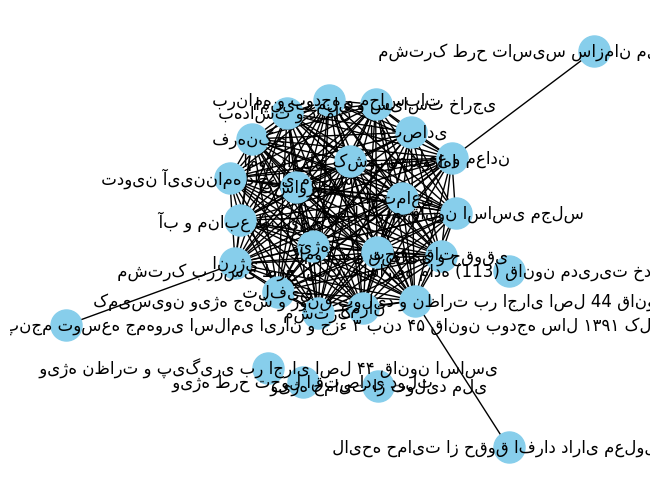

In [107]:
pos=nx.kamada_kawai_layout(tarh_same_comision)

nx.draw(tarh_same_comision, pos, with_labels=True, node_size=500, node_color="skyblue")


کدام کمیسیون ها تعامل بیشتری با سایر کمیسیون‌ها داشته اند؟.

In [108]:
betweenness_centrality5 = nx.betweenness_centrality(tarh_same_comision)
betweenness5 = pd.DataFrame.from_dict({
    'node': list(betweenness_centrality5.keys()),
    'centrality': list(betweenness_centrality5.values())
})
betweenness5.sort_values(by=['centrality'], ascending=False)

,node,centrality
20,کمیسیون ویژه جهش و رونق تولید و نظارت بر اجرا...,0.064615
8,صنایع و معادن,0.064615
12,انرژی,0.064615
0,عمران,0.000000
15,ویژه,0.000000
25,مشترک طرح تاسیس سازمان ملی استاندارد ایران,0.000000
24,اصل نودم قانون اساسی مجلس,0.000000
23,لایحه حمایت از حقوق افراد دارای معلولیت,0.000000
22,مشترک بررسی طرح نحوه اجرای بند ب ماده ۳۴ قانو...,0.000000
21,ویژه حمایت از تولید ملی,0.000000


گراف زمانی طرح

In [109]:
time_graph=nx.DiGraph()

In [110]:
time_df=df2[['name','tarikh_vosul']]
time_df

,name,tarikh_vosul
0,طرح اصلاح ماده ۸ قانون منع فروش و واگذاری اراض...,1402-03-07 00:00:00
1,طرح اصلاح ماده ۵۴ قانون دفاتر اسنادرسمی وکانون...,1402-03-09 00:00:00
2,طرح اصلاح موادی از قانون حمایت خانواده مصوب ۱...,1402-03-22 00:00:00
3,طرح فهرست احکام نامعتبر در حوزه تجارت,1402-03-22 00:00:00
4,طرح اصلاح ماده ۱ قانون تشکیل سازمان روانشناسی ...,1401-03-23 00:00:00
...,...,...
2780,طرح فهرست قوانین و احکام نامعتبر در حوزه کار,1402-01-16 00:00:00
2781,لایحه بودجه\nسال 1385 کل کشور,1384-10-18 00:00:00
2782,لایحه\nموافقتنامه بازرگانی بین دولت جمهوری اسل...,1383-08-10 00:00:00
2783,لایحه اصلاح\nقانون افزایش مستمری والدین شهداء ...,1384-01-24 00:00:00


In [111]:
time_df.dropna()

,name,tarikh_vosul
0,طرح اصلاح ماده ۸ قانون منع فروش و واگذاری اراض...,1402-03-07 00:00:00
1,طرح اصلاح ماده ۵۴ قانون دفاتر اسنادرسمی وکانون...,1402-03-09 00:00:00
2,طرح اصلاح موادی از قانون حمایت خانواده مصوب ۱...,1402-03-22 00:00:00
3,طرح فهرست احکام نامعتبر در حوزه تجارت,1402-03-22 00:00:00
4,طرح اصلاح ماده ۱ قانون تشکیل سازمان روانشناسی ...,1401-03-23 00:00:00
...,...,...
2780,طرح فهرست قوانین و احکام نامعتبر در حوزه کار,1402-01-16 00:00:00
2781,لایحه بودجه\nسال 1385 کل کشور,1384-10-18 00:00:00
2782,لایحه\nموافقتنامه بازرگانی بین دولت جمهوری اسل...,1383-08-10 00:00:00
2783,لایحه اصلاح\nقانون افزایش مستمری والدین شهداء ...,1384-01-24 00:00:00


In [112]:
for _, row in time_df.iterrows():
    time_graph.add_edge(row['name'],'Event', timestamp=str(row['tarikh_vosul']))

In [113]:
print(time_graph)

DiGraph with 2650 nodes and 2649 edges


In [114]:
nx.write_graphml(time_graph,'tarh_time.graphml')

In [ ]:
from networkx.algorithms import community

louvain_communities = list(community.louvain_communities(time_graph))
num_communities = len(louvain_communities)
print("Number of Communities:", num_communities)
for i, community_nodes in enumerate(louvain_communities):
    print(f"Community {i + 1}: {list(community_nodes)}")

In [116]:
from networkx.algorithms.community.louvain import modularity
louvain_modularity=modularity(time_graph ,louvain_communities )
louvain_modularity

0.0

پرکارترین روزهای مجلس

In [117]:
time_graph.remove_node('Event')


In [118]:
degree_centrality6 = nx.degree_centrality(time_graph)
degrees6 = pd.DataFrame.from_dict({
    'node': list(degree_centrality6.keys()),
    'centrality': list(degree_centrality6.values())
})
degrees6.sort_values(by=['centrality'], ascending=False)

,node,centrality
0,طرح اصلاح ماده ۸ قانون منع فروش و واگذاری اراض...,0.0
1760,لایحه تمدید مدت اجرای آزمایشی قانون مدیریت خدم...,0.0
1762,طرح عملیات بانکی بدون ربا,0.0
1763,لایحه موافقتنامه استرداد مجرمین بین جمهوری اسل...,0.0
1764,طرح استفساریه قانون پولی و بانکی و ماده (39),0.0
...,...,...
884,طرح ارائه تسهیلات برای امور وقفی,0.0
885,طرح اصلاح ماده (77) قانون شهرداری مصوب 1334 با...,0.0
886,طرح متوازن سازی بهره برداری از منابع گاز کشور,0.0
887,طرح استفاده از تسهیلات صندوق ذخیره ارزی,0.0


گراف سوابق اجرایی و کمیسیون‌ها

In [ ]:
df

In [119]:
edu_df=df[['savagegh_tahsilat.2','ozviat_comision']]

In [120]:
edu_df=edu_df.drop_duplicates()

In [121]:
# Replace non-standard commas with standard commas in 'ozviat_comision'
edu_df.loc[:, 'ozviat_comision'] = edu_df['ozviat_comision'].str.replace('،', ',')

# Split 'ozviat_comision' and create 'comission' column
edu_df['comission'] = edu_df['ozviat_comision'].str.split(',')
edu_df_=edu_df.explode('comission' , ignore_index=False)

In [122]:
edu_df_=edu_df_.drop('ozviat_comision' , axis=1)

In [123]:
edu_df_

,savagegh_tahsilat.2,comission
0,دانشجوی دکتری جزا و جرم شناسی,کمیسیون عمران
0,دانشجوی دکتری جزا و جرم شناسی,کمیسیون تحقیق
0,دانشجوی دکتری جزا و جرم شناسی,کمیسیون عمران
43,کارشناسی ارشد حقوق بین الملل,کمیسیون اصل نودم قانون اساسی مجلس
43,کارشناسی ارشد حقوق بین الملل,کمیسیون اصل نودم قانون اساسی مجلس
...,...,...
56466,دکترای علوم سیاسی,کمیسیون تدوین آیین‌نامه داخلی مجلس
56484,دکترای حقوق,کمیسیون صنایع و معادن
56484,دکترای حقوق,کمیسیون تلفیق
56484,دکترای حقوق,کمیسیون صنایع و معادن


In [124]:
edu_df_=edu_df_.drop_duplicates()
edu_df_

,savagegh_tahsilat.2,comission
0,دانشجوی دکتری جزا و جرم شناسی,کمیسیون عمران
0,دانشجوی دکتری جزا و جرم شناسی,کمیسیون تحقیق
43,کارشناسی ارشد حقوق بین الملل,کمیسیون اصل نودم قانون اساسی مجلس
85,دکترای پزشکی,کمیسیون بهداشت و درمان
158,فوق لیسانس مهندسی مکانیک,کمیسیون تدوین آیین‌نامه داخلی مجلس
...,...,...
56108,- دکتری مدیریت دفاعی,کمیسیون تلفیق
56173,دکترای مدیریت کسب و کار,کمیسیون امور داخلی کشور و شوراها
56173,دکترای مدیریت کسب و کار,کمیسیون امنیت ملی و سیاست خارجی
56466,دکترای علوم سیاسی,کمیسیون تدوین آیین‌نامه داخلی مجلس


In [125]:
edu_df_=edu_df_.dropna()

In [126]:
edu_graph=nx.Graph()

In [127]:
edu_graph.add_nodes_from(edu_df_['savagegh_tahsilat.2'] , bipartite=0)
edu_graph.add_nodes_from(edu_df_['comission'] , bipartite=1)
edu_edges = [(row['savagegh_tahsilat.2'], row['comission']) for index, row in edu_df_.iterrows()]
edu_graph.add_edges_from(edu_edges)

In [128]:
print(edu_graph)

Graph with 172 nodes and 283 edges


In [129]:
nx.write_graphml(edu_graph,'edu_comission.graphml')

communities

In [130]:
from networkx.algorithms import community

louvain_communities = list(community.louvain_communities(edu_graph))
num_communities = len(louvain_communities)
print("Number of Communities:", num_communities)
for i, community_nodes in enumerate(louvain_communities):
    print(f"Community {i + 1}: {list(community_nodes)}")


Number of Communities: 10
Community 1: ['- کارشناسی ارشد مدیریت MBA با گرایش مالی', 'دکترای مهندسی عمران', ' کمیسیون کمیسیون ویژه جهش و رونق تولید و نظارت بر اجرای اصل 44 قانون اساسی', 'لیسانس حقوق قضایی و عمران', 'کارشناسی ارشد مهندسی عمران، سازه', 'کارشناسی ارشد مدیریت استراتژیک', 'دکتری پزشکی  - دکتری مدیریت', ' کمیسیون عمران', 'دکترای برنامه ریزی شهری', 'دکترای علوم پیشرفته مدیریت', ' کمیسیون تحقیق', 'فوق ایسانس علوم توانبخشی ، دانشجوی دکترای سیاستگذاری (علوم و فناوری', 'دانشجوی دکتری جزا و جرم شناسی', 'مهندسی عمران', 'دکترای حقوق جزا', '-دکتری مدیریت استراتژیک -کارشناسی ارشد اقتصاد', 'کارشناسی ارشد مردم شناسی']
Community 2: ['پزشک عمومی', 'دکترای فارماسیوتیکس', ' کمیسیون اصل نودم قانون اساسی مجلس ', 'دکترای پزشکی', 'دکترای پزشکی هسته ای', 'ادبیات عرب (', 'دکترای داروسازی', 'کارشناس ارشد علوم سیاسی', 'MD, Phd, Lymphologist پزشک؛ لنفولوژیست و متخصص طب ایرانی', 'فوق لیسانس مهندسی برق', 'دکتری تخصصی پزشکی', 'حوزوی', ' کمیسیون بهداشت و درمان ', 'دکترای مطالعات منطقه ای', 'دکترای پزشکی 

In [131]:
from networkx.algorithms.community.louvain import modularity
louvain_modularity=modularity(edu_graph ,louvain_communities )
louvain_modularity

0.564053740214012